In [6]:
!pip3 install tensorflow


In [46]:
!pip install matplotlib

  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.47.0-cp311-cp311-win_amd64.whl.metadata (160 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl (187 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.47.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Nicky - 3\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\fontTools\\ttLib\\tables\\_g_c_i_d.py'
Check the permissions.



  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.47.0-cp311-cp311-win_amd64.whl.metadata (160 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached Pillow-10.1.0-cp311-cp311-win_amd64.whl.metadata (9.6 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl (187 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.47.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
Using cached Pillow-10.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [43]:
for thing in os.listdir('data'):
    for a in os.listdir(os.path.join('data', thing)):
        myPath = os.path.join('data', thing, a)
        try: 
            img = cv2.imread(myPath)
            tip = imghdr.what(myPath)

           
        except Exception as e:
            print("ERROR" + e )
    print("DID ONE")
print("DONE")

DID ONE
DID ONE
DID ONE
DID ONE


KeyboardInterrupt: 

In [77]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('data')
it = data.as_numpy_iterator()
batch = it.next()




Found 47968 files belonging to 7 classes.


In [118]:
batch = it.next()
batch[1]

array([3, 2, 4, 3, 2, 2, 4, 4, 3, 2, 2, 5, 4, 2, 4, 3, 3, 4, 3, 3, 2, 3,
       3, 4, 4, 3, 6, 4, 3, 4, 2, 4])

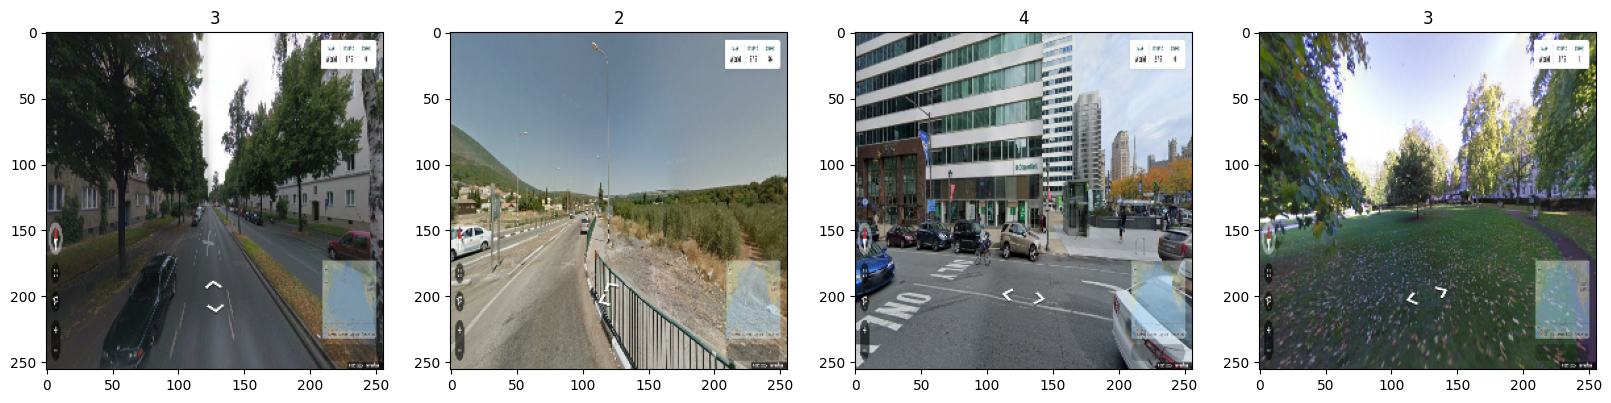

In [119]:
fig, ax  = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]): 
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [78]:
scale = batch[0] / 255


In [79]:
data = data.map(lambda x,y: (x/255, y))

In [80]:
data.as_numpy_iterator().next()[0].max()

1.0

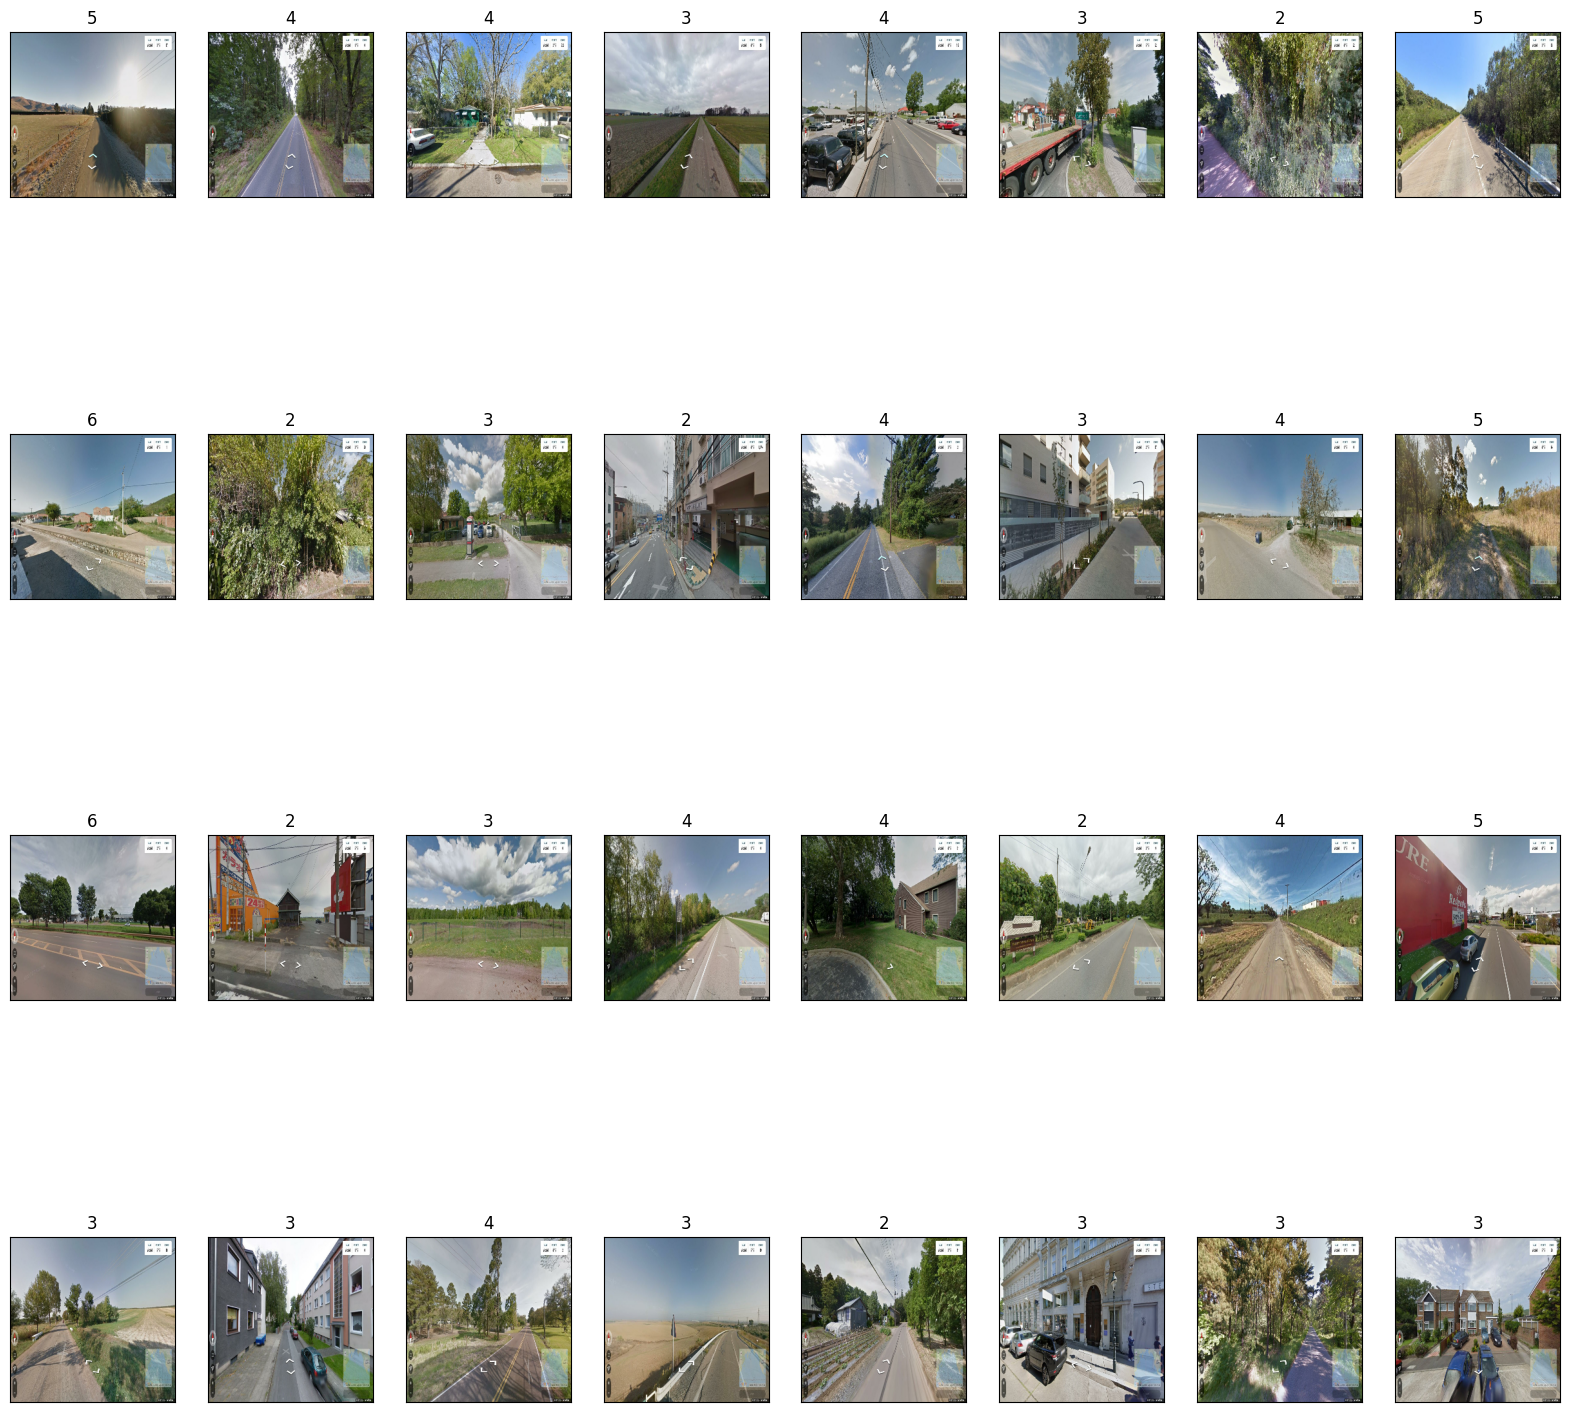

In [94]:
n_rows = 4
n_cols = 8

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

axes = axes.flatten()

for idx, img in enumerate(batch[0][:32]):

    axes[idx].imshow(img.astype(int))


    axes[idx].title.set_text(batch[1][idx])

    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

#plt.tight_layout()
plt.show()

In [95]:
trainS = int(len(data) * .7)
valS = int(len(data) * .2) + 1
testS = int(len(data) * .1) + 1

In [96]:
train = data.take(trainS)
val = data.skip(trainS).take(valS)
test = data.skip(trainS + valS).take(testS)

In [99]:
len(val)

300

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [124]:
model = Sequential()

In [125]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [126]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [127]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                      

In [128]:
logdir = 'logs'

In [129]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
1049/1049 [==============================] - 893s 850ms/step - loss: -46090829824.0000 - accuracy: 8.9371e-05 - val_loss: -229531041792.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
 802/1049 [=====================>........] - ETA: 3:11 - loss: -817439768576.0000 - accuracy: 3.8965e-05